# Trying to get a feel for the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
TRAIN_PATH = 'train.csv'
data = pd.read_csv(TRAIN_PATH)

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

In [5]:
train['ParentlessChild'] = (train.Age<18) & (train.Parch==0)

/home/guy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
len(train[train['ParentlessChild']==True])

25

In [7]:
train['LonelyChild'] = (train.ParentlessChild) & (train.SibSp==0)

/home/guy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
len(train[train['LonelyChild']==True])

17

In [9]:
lc = train[train['LonelyChild']==True]

In [10]:
pcalssVsSurv = lc[['Survived','Pclass']]
pcalssVsSurv.groupby(lc.Pclass).Survived.mean()

Pclass
1    1.000000
2    1.000000
3    0.357143
Name: Survived, dtype: float64

/home/guy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


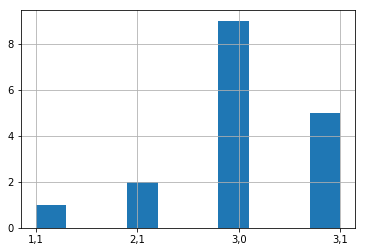

In [11]:
pcalssVsSurv['PcalssSurv'] = pcalssVsSurv.Pclass.astype(str) + ',' + pcalssVsSurv.Survived.astype(str)
pcalssVsSurv['PcalssSurv'].hist()


## Is being a lonely child correlated with social economic status?

In [12]:
pop_mean = train['Pclass'].mean()
pop_std  = train['Pclass'].std()

In [13]:
lc = train[train.LonelyChild==True]
sample_mean = lc['Pclass'].mean()
sample_std  = lc['Pclass'].std()

In [14]:
z_score = (sample_mean - pop_mean)/pop_std

In [15]:
z_score

0.5482899000579412

In [17]:
from scipy.stats import norm
pv = 1-norm.cdf(z_score)
pv

0.2917464306582046

so slightly correlated